In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder

In [2]:
t1 = pd.read_excel(os.path.join('data', 'Assessment Part 1 - Data for SQL Coding.xlsx'), sheet_name='Table_1')

In [3]:
t2 = pd.read_excel(os.path.join('data', 'Assessment Part 1 - Data for SQL Coding.xlsx'), sheet_name='Table_2')

In [4]:
t1

,ACCOUNT_ID,OPEN_DATE,CLOSE_DATE
0,780892721,2021-03-10,2023-08-26
1,251313365,2020-11-05,2023-05-23
2,523586641,2021-03-09,2023-01-19
3,80865785,2020-02-14,2023-11-19
4,314038173,2022-05-04,2022-11-13
...,...,...,...
495,163057060,2023-10-23,2023-11-04
496,643569188,2021-03-17,2021-04-16
497,35595367,2023-08-20,2023-09-15
498,419468163,2021-05-17,2022-01-05


In [5]:
t1['CLOSE_DATE'].isnull().any()

False

In [6]:
t1['OPEN_DATE']

0     2021-03-10
1     2020-11-05
2     2021-03-09
3     2020-02-14
4     2022-05-04
         ...    
495   2023-10-23
496   2021-03-17
497   2023-08-20
498   2021-05-17
499   2021-06-20
Name: OPEN_DATE, Length: 500, dtype: datetime64[ns]

In [7]:
(t1['OPEN_DATE'] < t1['CLOSE_DATE']).all()

False

In [8]:
t2

,ACCOUNT_ID,CUSTOMER_ID
0,780892721,50127
1,251313365,50194
2,523586641,50143
3,80865785,50150
4,314038173,50066
...,...,...
495,163057060,50122
496,643569188,50058
497,35595367,50058
498,419468163,50112


In [9]:
t1[t1['OPEN_DATE'] == t1['CLOSE_DATE']]

,ACCOUNT_ID,OPEN_DATE,CLOSE_DATE
114,710125158,2023-12-23,2023-12-23


In [10]:
(t1['ACCOUNT_ID'] == t2['ACCOUNT_ID']).all()

True

In [11]:
t = pd.merge(t1, t2, on='ACCOUNT_ID')
t

,ACCOUNT_ID,OPEN_DATE,CLOSE_DATE,CUSTOMER_ID
0,780892721,2021-03-10,2023-08-26,50127
1,251313365,2020-11-05,2023-05-23,50194
2,523586641,2021-03-09,2023-01-19,50143
3,80865785,2020-02-14,2023-11-19,50150
4,314038173,2022-05-04,2022-11-13,50066
...,...,...,...,...
495,163057060,2023-10-23,2023-11-04,50122
496,643569188,2021-03-17,2021-04-16,50058
497,35595367,2023-08-20,2023-09-15,50058
498,419468163,2021-05-17,2022-01-05,50112


In [12]:
x = t.groupby('CUSTOMER_ID').count()
x[x['ACCOUNT_ID'] >= 2]

,ACCOUNT_ID,OPEN_DATE,CLOSE_DATE
CUSTOMER_ID,,,
50002,2,2,2
50003,5,5,5
50004,2,2,2
50005,2,2,2
50008,3,3,3
...,...,...,...
50291,3,3,3
50293,5,5,5
50296,3,3,3


In [13]:
t3 = pd.read_excel(os.path.join('data', 'Assessment Part 2 - Credit Card Portfolio Data.xlsx'), sheet_name='Account Volume').iloc[1:]
t3.columns = ['Month', 'Awards', 'Low Rate', 'Low Fee', 'Neo']
t3.set_index('Month', inplace=True)
t3

,Awards,Low Rate,Low Fee,Neo
Month,,,,
2023-01-01,1523,1149,2063,495
2023-02-01,1565,1007,1831,480
2023-03-01,1329,825,1812,455
2023-04-01,1331,1151,1971,525
2023-05-01,1317,894,1913,503
2023-06-01,1483,993,2002,530
2023-07-01,955,1025,1871,474
2023-08-01,828,1000,2180,452
2023-09-01,899,983,2191,484


In [28]:
t3.iloc[:6].mean()

Awards      1424.666667
Low Rate    1003.166667
Low Fee          1932.0
Neo               498.0
dtype: object

In [29]:
t3.iloc[6:].mean()

Awards            870.5
Low Rate    1023.833333
Low Fee          2041.0
Neo          490.833333
dtype: object

<Axes: xlabel='Month'>

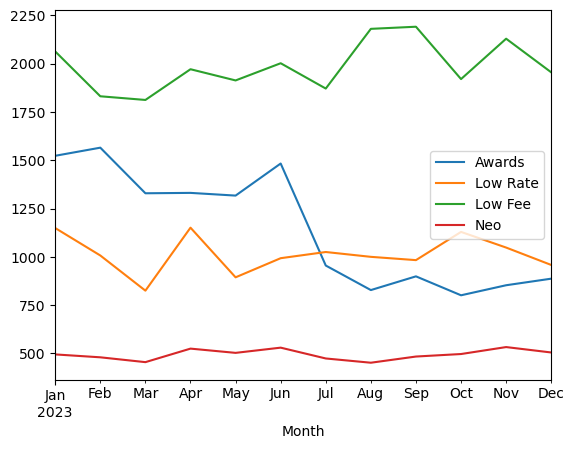

In [16]:
t3.plot()

In [17]:
t4 = pd.read_excel(os.path.join('data', 'Assessment Part 2 - Credit Card Portfolio Data.xlsx'), sheet_name='Delinquency Rates').iloc[1:]
t4.columns = ['Month', 'Awards', 'Low Rate', 'Low Fee', 'Neo']
t4.set_index('Month', inplace=True)
t4

,Awards,Low Rate,Low Fee,Neo
Month,,,,
2023-01-01,0.0119,0.0237,0.0188,0.0413
2023-02-01,0.011,0.0269,0.0207,0.0394
2023-03-01,0.0105,0.0232,0.02,0.0411
2023-04-01,0.0088,0.0252,0.0209,0.039
2023-05-01,0.01,0.0242,0.0215,0.0384
2023-06-01,0.0084,0.0248,0.0199,0.0404
2023-07-01,0.0089,0.0234,0.0218,0.0384
2023-08-01,0.0108,0.0262,0.0193,0.0398
2023-09-01,0.0094,0.0243,0.0217,0.0406


In [18]:
t4['Low Rate'].iloc[:-2].mean()

0.024880000000000003

In [19]:
t4.mean()

Awards      0.009933
Low Rate    0.026433
Low Fee     0.020117
Neo         0.039758
dtype: object

<Axes: xlabel='Month'>

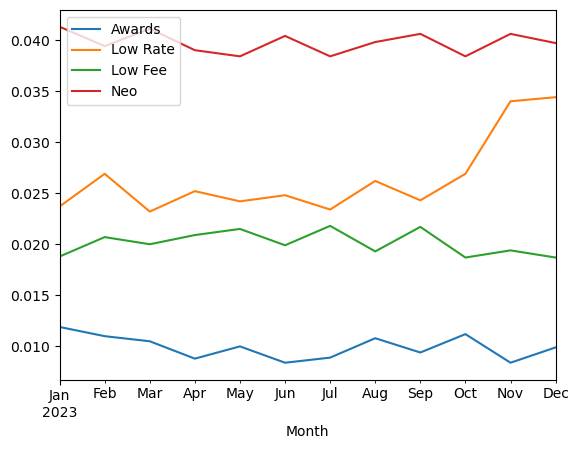

In [20]:
t4.plot()

<Axes: xlabel='Month'>

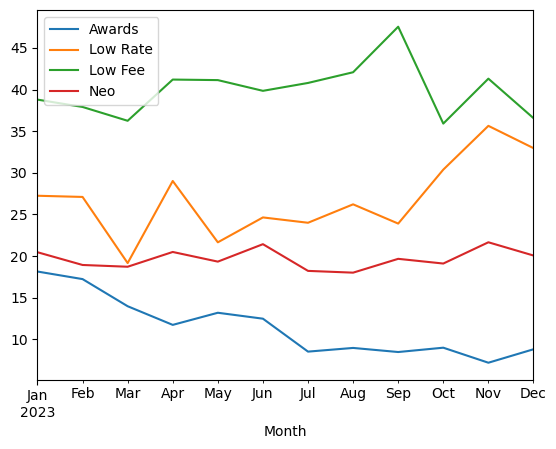

In [31]:
(t3*t4).plot()

In [32]:
t3.iloc[:6].sum(axis=1)

Month
2023-01-01    5230
2023-02-01    4883
2023-03-01    4421
2023-04-01    4978
2023-05-01    4627
2023-06-01    5008
dtype: object

In [33]:
t3.iloc[6:].sum(axis=1)

Month
2023-07-01    4325
2023-08-01    4460
2023-09-01    4557
2023-10-01    4347
2023-11-01    4563
2023-12-01    4305
dtype: object

In [25]:
overall_rate = (t3*t4).sum(axis=1) / t3.sum(axis=1)
overall_rate

Month
2023-01-01    0.019997
2023-02-01    0.020708
2023-03-01    0.019913
2023-04-01    0.020568
2023-05-01    0.020586
2023-06-01    0.019636
2023-07-01     0.02115
2023-08-01    0.021347
2023-09-01    0.021842
2023-10-01      0.0217
2023-11-01    0.023173
2023-12-01    0.022844
dtype: object

<Axes: xlabel='Month'>

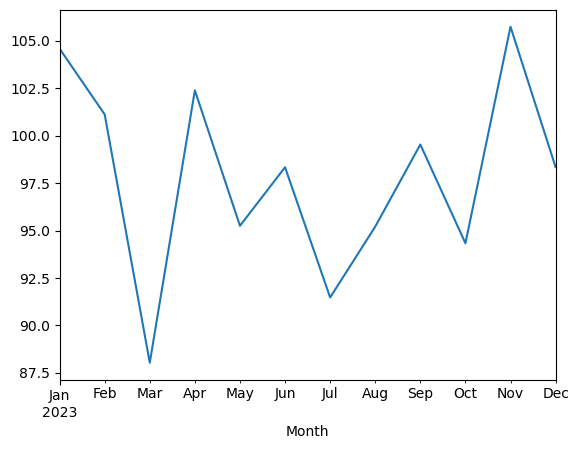

In [34]:
(t3*t4).sum(axis=1).plot()

<Axes: xlabel='Month'>

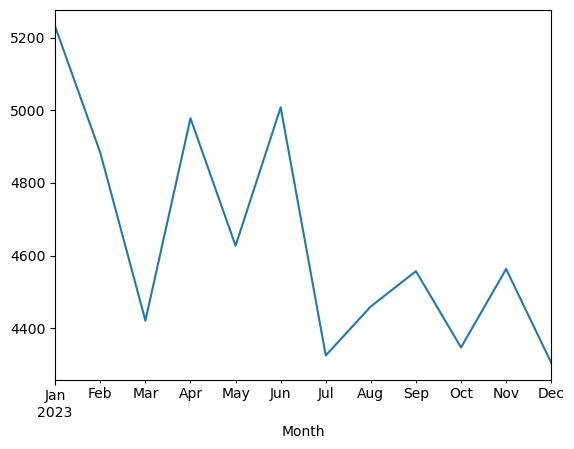

In [36]:
t3.sum(axis=1).plot()

In [37]:
overall_rate.iloc[:6].mean()

0.020234456443842513

<Axes: xlabel='Month'>

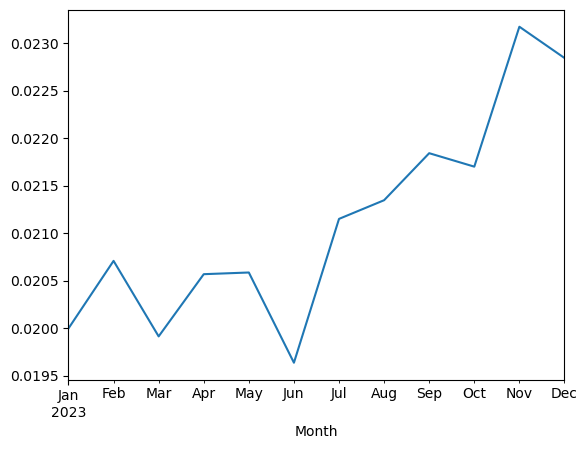

In [26]:
overall_rate.plot()